## liberaries

In [68]:
# main liberares
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# preprocessing
from sklearn import utils
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score, cross_val_predict



# model
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier

import xgboost as xgb


# metrics

from sklearn.metrics import confusion_matrix

## the data

In [3]:
# read csv file

#train data
df = pd.read_csv(r"D:\2-Machine Learning\Dataset For Machine Learning\Titanic\train.csv")

#test data
X_test = pd.read_csv(r"D:\2-Machine Learning\Dataset For Machine Learning\Titanic\test.csv")

In [4]:
# head of the data
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# show the test data set
X_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
# some info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
# some statesticss
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## exploratory data analysis

In [8]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [9]:
# show the uique value for some cols
for col in ["Ticket", "Embarked", "Cabin"]:
    print(f"the unique value of {col} is {df[col].unique()}")
    print("=="*50)

the unique value of Ticket is ['A/5 21171' 'PC 17599' 'STON/O2. 3101282' '113803' '373450' '330877'
 '17463' '349909' '347742' '237736' 'PP 9549' '113783' 'A/5. 2151'
 '347082' '350406' '248706' '382652' '244373' '345763' '2649' '239865'
 '248698' '330923' '113788' '347077' '2631' '19950' '330959' '349216'
 'PC 17601' 'PC 17569' '335677' 'C.A. 24579' 'PC 17604' '113789' '2677'
 'A./5. 2152' '345764' '2651' '7546' '11668' '349253' 'SC/Paris 2123'
 '330958' 'S.C./A.4. 23567' '370371' '14311' '2662' '349237' '3101295'
 'A/4. 39886' 'PC 17572' '2926' '113509' '19947' 'C.A. 31026' '2697'
 'C.A. 34651' 'CA 2144' '2669' '113572' '36973' '347088' 'PC 17605' '2661'
 'C.A. 29395' 'S.P. 3464' '3101281' '315151' 'C.A. 33111' 'S.O.C. 14879'
 '2680' '1601' '348123' '349208' '374746' '248738' '364516' '345767'
 '345779' '330932' '113059' 'SO/C 14885' '3101278' 'W./C. 6608'
 'SOTON/OQ 392086' '343275' '343276' '347466' 'W.E.P. 5734' 'C.A. 2315'
 '364500' '374910' 'PC 17754' 'PC 17759' '231919' '244367

In [10]:
# drop uselless features
df = df.drop(columns=["Name"], axis=1)

# drop form the test
X_test = X_test.drop(columns=["Name"], axis=1)

In [11]:
df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,female,14.0,1,0,237736,30.0708,NaN,C


In [12]:
# check the nulls
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
# drop to the duplicates
df.drop_duplicates
X_test.drop_duplicates

<bound method DataFrame.drop_duplicates of      PassengerId  Pclass     Sex   Age  SibSp  Parch              Ticket  \
0            892       3    male  34.5      0      0              330911   
1            893       3  female  47.0      1      0              363272   
2            894       2    male  62.0      0      0              240276   
3            895       3    male  27.0      0      0              315154   
4            896       3  female  22.0      1      1             3101298   
..           ...     ...     ...   ...    ...    ...                 ...   
413         1305       3    male   NaN      0      0           A.5. 3236   
414         1306       1  female  39.0      0      0            PC 17758   
415         1307       3    male  38.5      0      0  SOTON/O.Q. 3101262   
416         1308       3    male   NaN      0      0              359309   
417         1309       3    male   NaN      1      1                2668   

         Fare Cabin Embarked  
0      7.8292

In [14]:
# get the number of died pepole
died_count = df[df["Survived"] == 0].shape
died_count[0]

549

In [15]:
# get the number of suvived pepole
suvived_count = df[df["Survived"] == 1].shape
suvived_count[0]

342

In [16]:

lst = [died_count[0], suvived_count[0]]
lst

[549, 342]

### `*show the number of survived vs died `

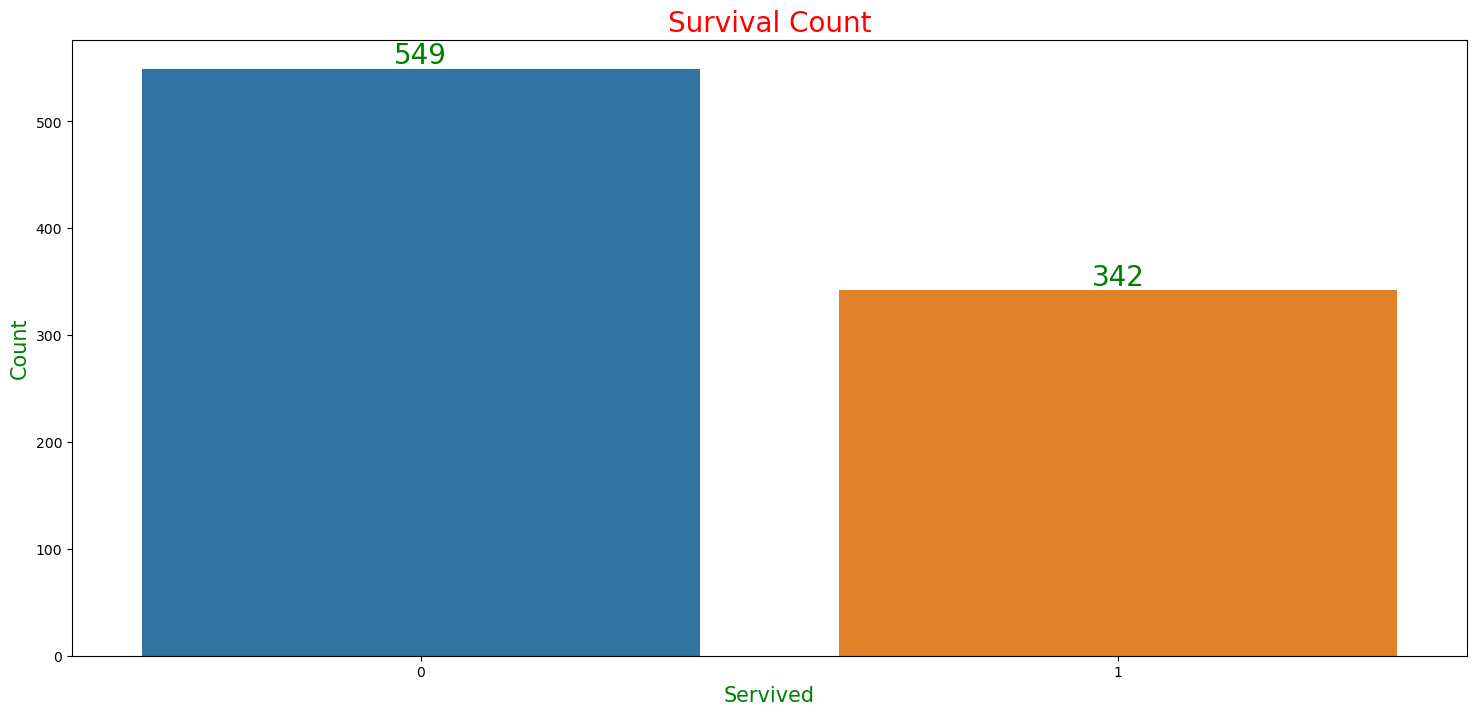

In [17]:
# show the number of survived vs died 
plt.figure(figsize=(18, 8))
sns.countplot(x='Survived', data=df)
plt.title('Survival Count', fontsize=20, color="red")
plt.xlabel('Servived', fontsize=15, color="green")
plt.ylabel('Count', fontsize=15, color="green")

# show the counts
for i in range(2):
    plt.text(x=i, y=lst[i]+5, s=lst[i], ha="center", fontsize=20, color="green")
plt.show()


In [18]:
# show the value count for Pclass column
value_count = df["Pclass"].value_counts()
value_count.index

Index([3, 1, 2], dtype='int64', name='Pclass')

### `* Passenger Class Distribution`

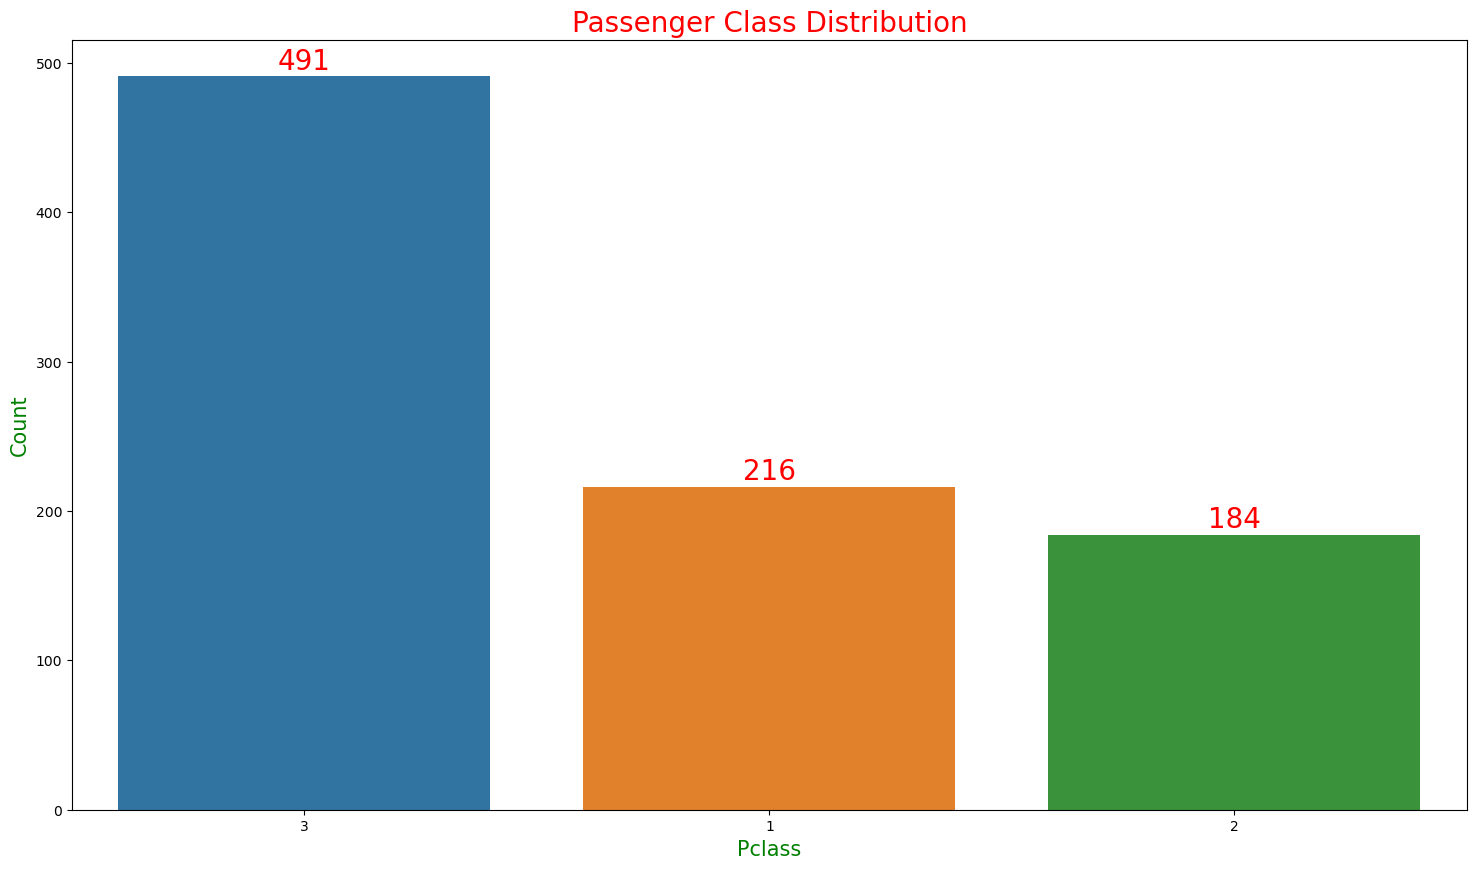

In [19]:
# Passenger Class Distribution
plt.figure(figsize=(18, 10))
sns.countplot(x='Pclass', data=df, order=value_count.index)
plt.title('Passenger Class Distribution', fontsize=20, color="red")
plt.xlabel("Pclass", fontsize=15, color="green")
plt.ylabel("Count", fontsize=15, color="green")

# show the count
for i in range(value_count.shape[0]):
    plt.text(x=i, y=value_count.values[i]+5, s=value_count.values[i], fontsize=20, color="red", ha="center")
plt.show()


In [20]:
# show the value count for Sex column
value_count = df["Sex"].value_counts()
value_count.index

Index(['male', 'female'], dtype='object', name='Sex')

### ` Gender Distribution`

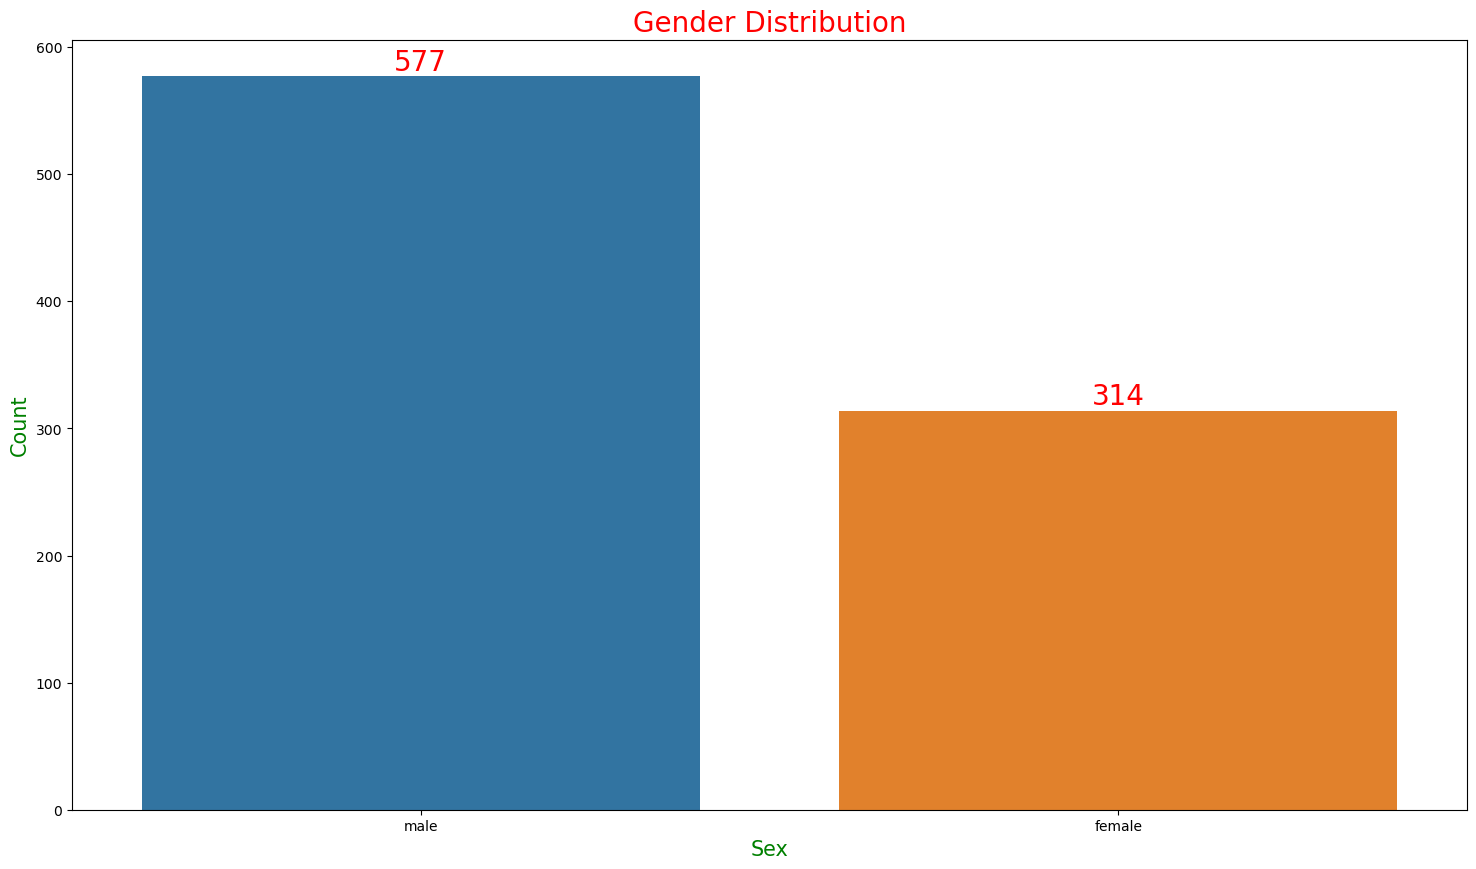

In [21]:
# Gender Distribution
plt.figure(figsize=(18, 10))
sns.countplot(x='Sex', data=df, order=value_count.index)
plt.title('Gender Distribution', fontsize=20, color="red")
plt.xlabel("Sex", fontsize=15, color="green")
plt.ylabel("Count", fontsize=15, color="green")


# show the count
for i in range(value_count.shape[0]):
    plt.text(x=i, y=value_count.values[i]+5, s=value_count.values[i], fontsize=20, color="red", ha="center")

plt.show()


In [22]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


### `Age Distribution by Gender and Survival Status`

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


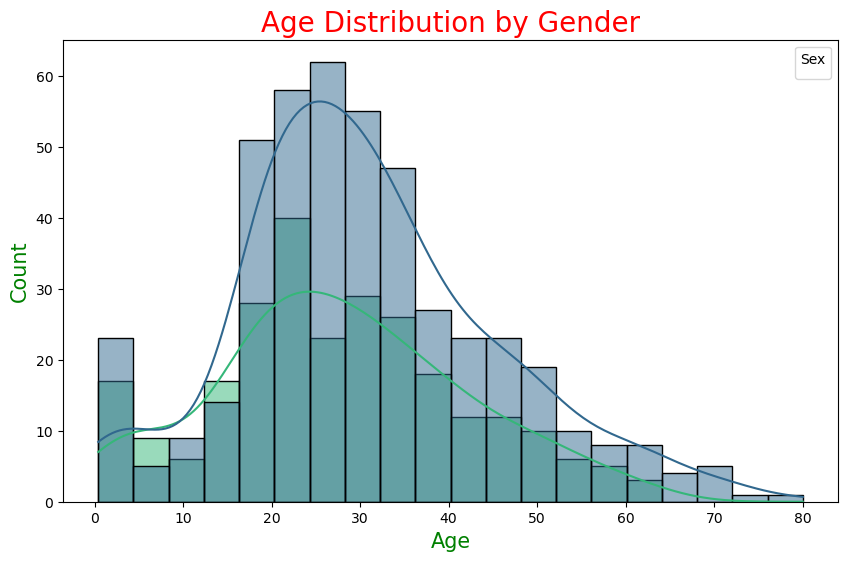

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


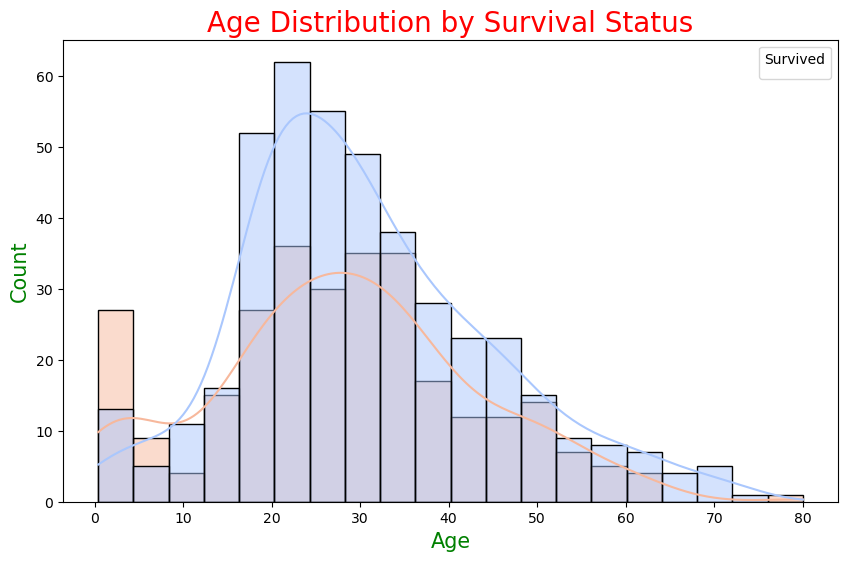

In [23]:
#  Age Distribution by Gender and Survival Status
plt.figure(figsize=(10, 6))
sns.histplot(df, x='Age', hue='Sex', kde=True, palette='viridis')
plt.title('Age Distribution by Gender', fontsize=20, color="red")
plt.xlabel('Age', fontsize=15, color="green")
plt.ylabel("Count", fontsize=15, color="green")
plt.legend(title='Sex')
plt.show()



plt.figure(figsize=(10, 6))
sns.histplot(df, x='Age', hue='Survived', kde=True, palette='coolwarm')
plt.title('Age Distribution by Survival Status', fontsize=20, color="red")
plt.xlabel('Age', fontsize=15, color="green")
plt.ylabel("Count", fontsize=15, color="green")
plt.legend(title='Survived', loc='upper right')
plt.show()


### ` Fare Distribution by Passenger Class`

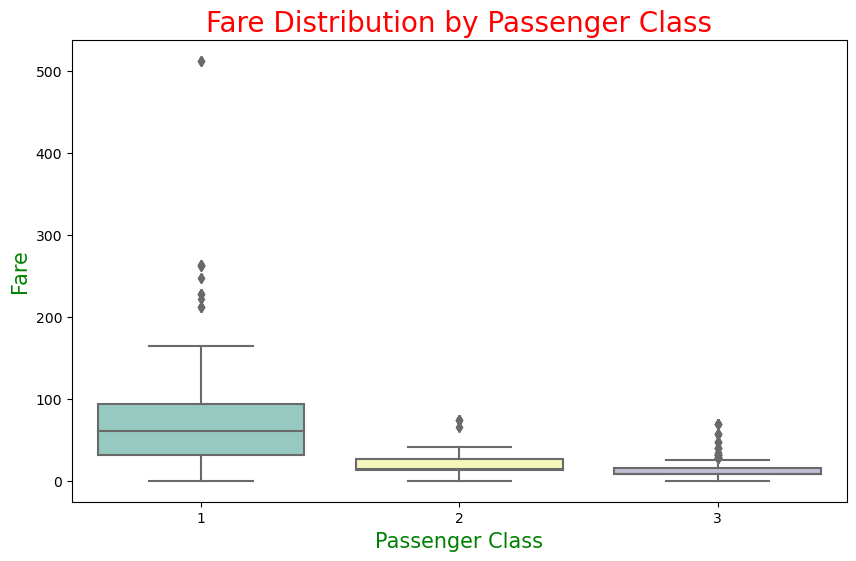

In [24]:
#  Fare Distribution by Passenger Class
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Fare', data=df, palette='Set3')
plt.title('Fare Distribution by Passenger Class', fontsize=20, color="red")
plt.xlabel('Passenger Class', fontsize=15, color="green")
plt.ylabel('Fare', fontsize=15, color="green")
plt.show()


### `*Survival Rate by Passenger Class and Gender`

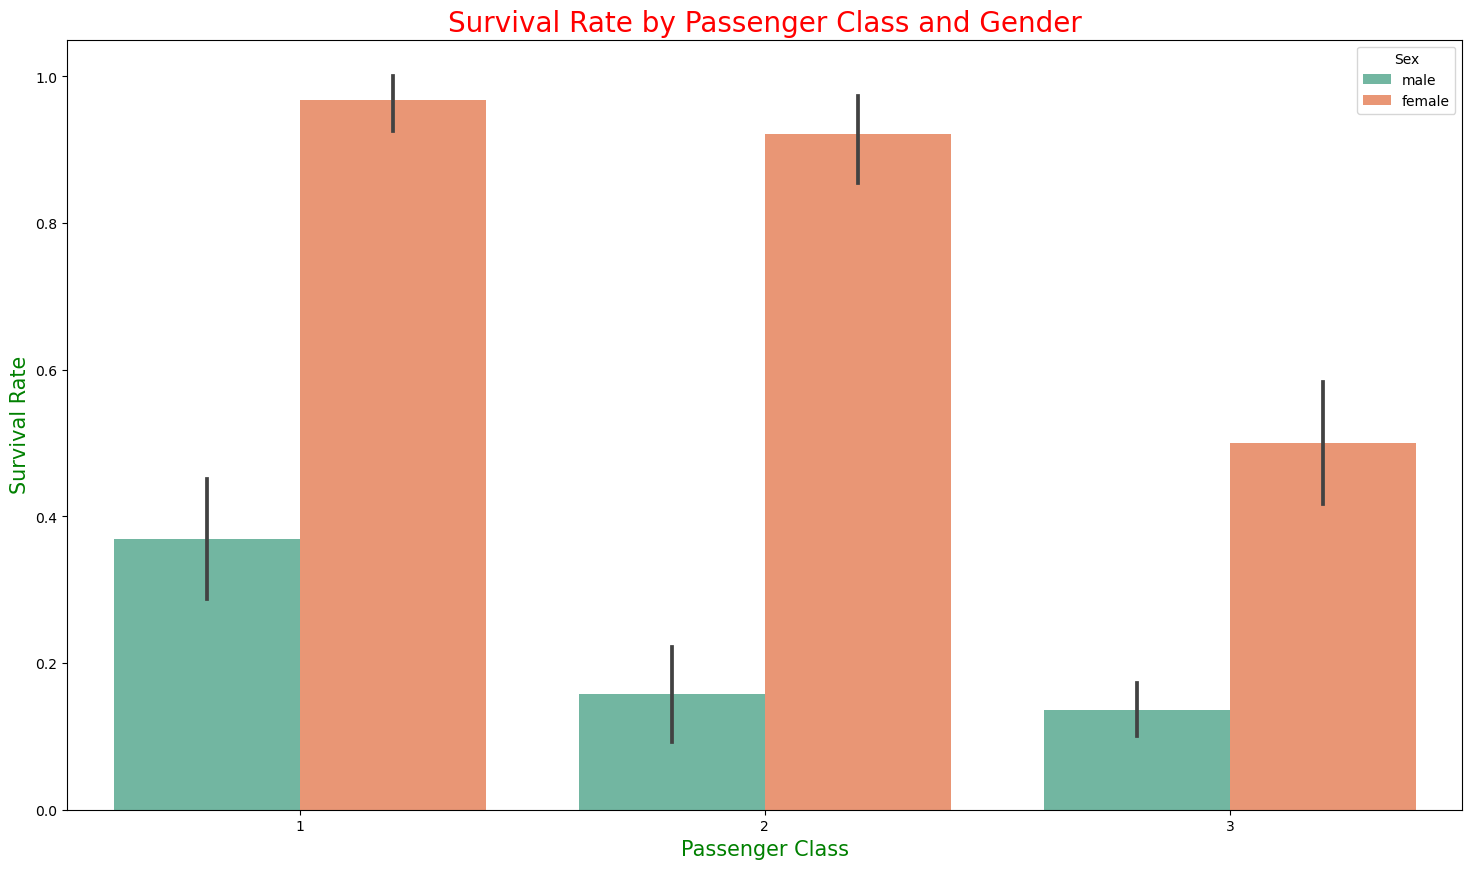

In [25]:
# Survival Rate by Passenger Class and Gender
plt.figure(figsize=(18, 10))
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=df, palette='Set2')
plt.title('Survival Rate by Passenger Class and Gender', fontsize=20, color="red")
plt.xlabel('Passenger Class', fontsize=15, color="green")
plt.ylabel('Survival Rate', fontsize=15, color="green")
plt.legend(title='Sex')
plt.show()


### `* Histigram to show the data`

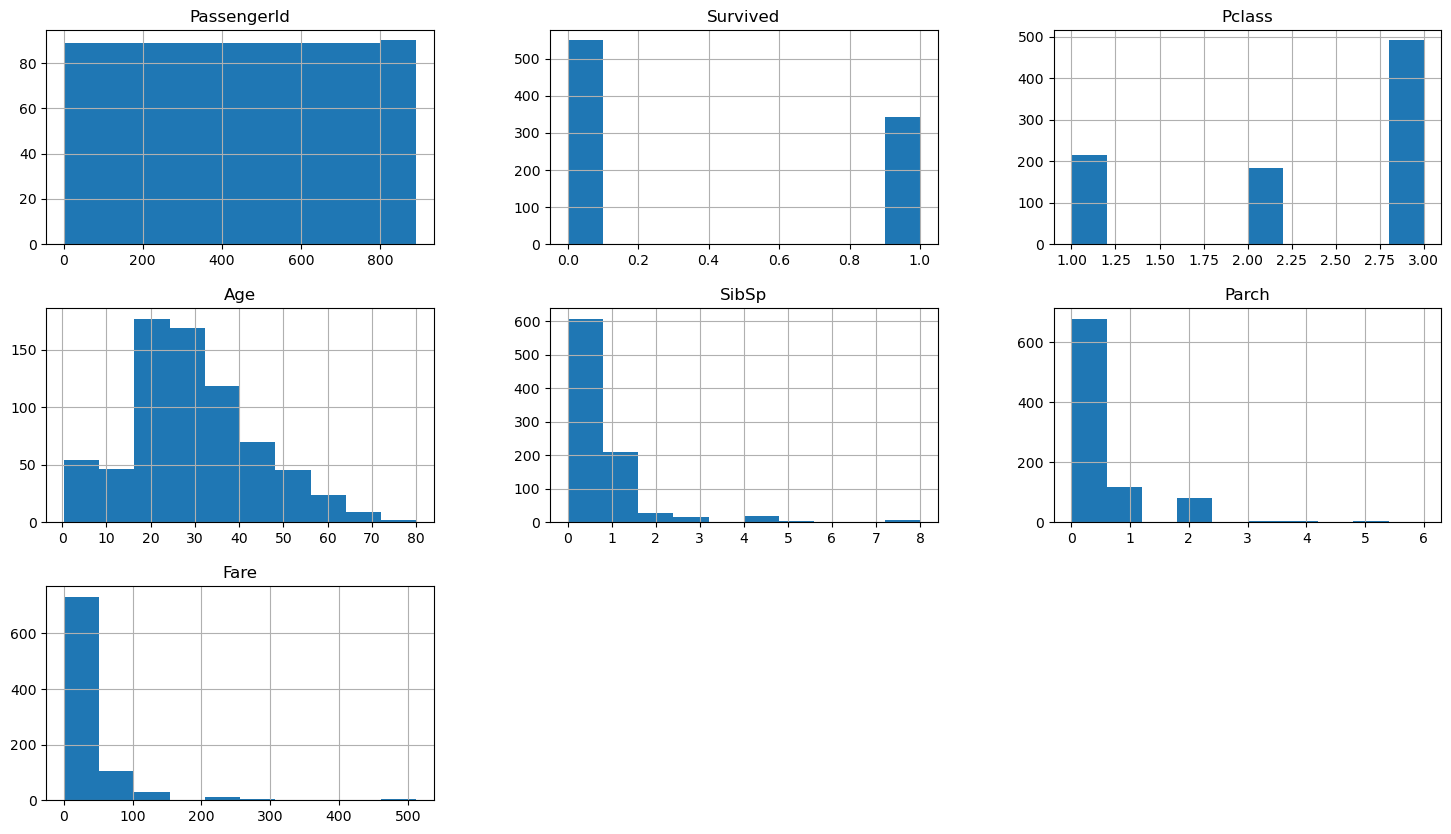

In [26]:
# Histigram to show the data
df.hist(figsize=(18, 10));

### `* show the corre between the features`

<Axes: >

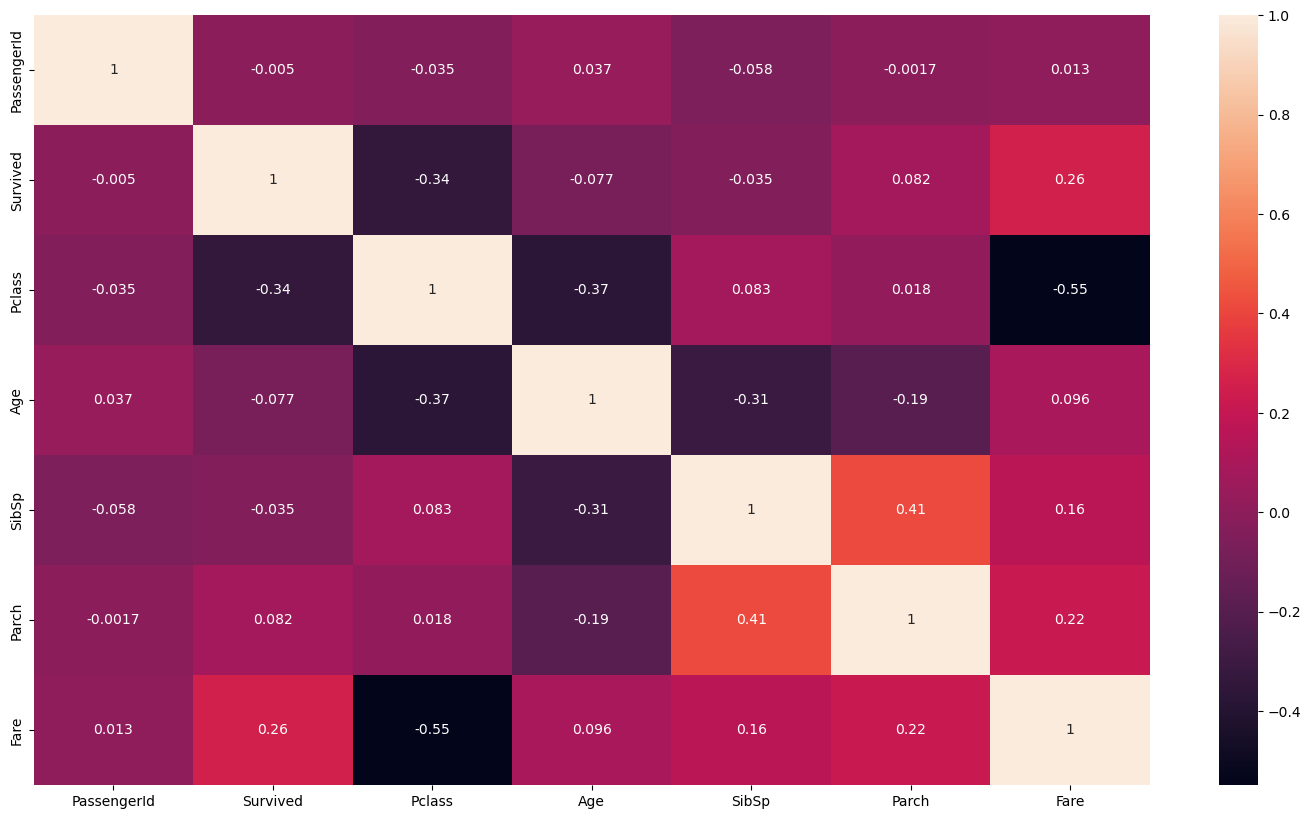

In [27]:
# show the corre
num_cols = [col for col in df.columns if df[col].dtype != object]

plt.figure(figsize=(18, 10))
sns.heatmap(data=df[num_cols].corr(), annot=True)

## Data Preprocessing

In [28]:
# check the nulls in df
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [29]:
# check the nulls in test
X_test.isna().sum()

PassengerId      0
Pclass           0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [30]:
# show the numeric cols
numeric_cols = [col for col in df.columns if df[col].dtype != object]

#show the categorical cols
cate_cols = [col for col in df.columns if df[col].dtype == object]

print(f"the numeric cols ==> {numeric_cols}")
print(f"the categorical cols ==> {cate_cols}")

the numeric cols ==> ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
the categorical cols ==> ['Sex', 'Ticket', 'Cabin', 'Embarked']


In [31]:
# drop the PassengerId column
df = df.drop(columns=["PassengerId"], axis=1)
X_test = X_test.drop(columns=["PassengerId"], axis=1)

In [32]:
# drop the Cabin column
df = df.drop(columns=["Cabin"], axis=1)
X_test = X_test.drop(columns=["Cabin"], axis=1)

In [33]:
# show the numeric cols in df
numeric_cols = [col for col in df.columns if df[col].dtype != object]

#show the categorical cols
cate_cols = [col for col in df.columns if df[col].dtype == object]

print(f"the numeric cols ==> {numeric_cols}")
print(f"the categorical cols ==> {cate_cols}")

the numeric cols ==> ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
the categorical cols ==> ['Sex', 'Ticket', 'Embarked']


In [34]:
# encode the categorical cols in df
label_encod = LabelEncoder()
for col in cate_cols:
    df_encoded = df
    df_encoded[col] = label_encod.fit_transform(df_encoded[col])
df_encoded

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,1,22.0,1,0,523,7.2500,2
1,1,1,0,38.0,1,0,596,71.2833,0
2,1,3,0,26.0,0,0,669,7.9250,2
3,1,1,0,35.0,1,0,49,53.1000,2
4,0,3,1,35.0,0,0,472,8.0500,2
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,101,13.0000,2
887,1,1,0,19.0,0,0,14,30.0000,2
888,0,3,0,NaN,1,2,675,23.4500,2
889,1,1,1,26.0,0,0,8,30.0000,0


In [35]:
# show the numeric cols in X_test
numeric_colsTest = [col for col in X_test.columns if X_test[col].dtype != object]

#show the categorical cols
cate_colsTest = [col for col in X_test.columns if X_test[col].dtype == object]

print(f"the numeric cols ==> {numeric_cols}")
print(f"the categorical cols ==> {cate_cols}")

the numeric cols ==> ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
the categorical cols ==> ['Sex', 'Ticket', 'Embarked']


In [36]:
# encode the categorical cols in df
for col in cate_colsTest:
    X_test_encoded = X_test
    X_test_encoded[col] = label_encod.fit_transform(X_test_encoded[col])
    
X_test_encoded

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,3,1,34.5,0,0,152,7.8292,1
1,3,0,47.0,1,0,221,7.0000,2
2,2,1,62.0,0,0,73,9.6875,1
3,3,1,27.0,0,0,147,8.6625,2
4,3,0,22.0,1,1,138,12.2875,2
...,...,...,...,...,...,...,...,...
413,3,1,NaN,0,0,267,8.0500,2
414,1,0,39.0,0,0,324,108.9000,0
415,3,1,38.5,0,0,346,7.2500,2
416,3,1,NaN,0,0,220,8.0500,2


In [37]:
# check the nulls in X_test_encoded
X_test_encoded.isna().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Ticket       0
Fare         1
Embarked     0
dtype: int64

In [38]:
# check the nulls in df_encoded
df_encoded.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Embarked      0
dtype: int64

In [39]:
# fill the missing value
imputer = SimpleImputer(strategy="median")
imputer.fit(df_encoded["Age"].values.reshape(-1, 1))

SimpleImputer(strategy='median')

In [40]:
# filling the train data
df_imputed = df_encoded
df_imputed["Age"] = imputer.transform(df_imputed["Age"].values.reshape(-1, 1))

In [41]:
# filling the test data
X_test_imputed = X_test_encoded
X_test_imputed["Age"] = imputer.transform(X_test_imputed["Age"].values.reshape(-1, 1))

In [42]:
# check the nulls in df_imputed
df_imputed.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [43]:
# check the nulls in X_test_imputed
X_test_imputed.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        1
Embarked    0
dtype: int64

In [44]:
# drop 
X_test_imputed = X_test_imputed.dropna()

In [45]:
# check the nulls in X_test_imputed
X_test_imputed.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

### `*Feature Engineering`

In [46]:
# Feature Engineering in the data

# Family Size
df_imputed['Family_Size'] = df_imputed['SibSp'] + df_imputed['Parch'] + 1  # +1 for the passenger themselves

# Alone Status
df_imputed['Alone'] = (df_imputed['Family_Size'] == 1).astype(int)  # 1 if passenger is alone, 0 if with family

# Fare per Person
df_imputed['Fare_Per_Person'] = df_imputed['Fare'] / df_imputed['Family_Size']

In [49]:
df_imputed

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family_Size,Alone,Fare_Per_Person
0,0,3,1,22.0,1,0,523,7.2500,2,2,0,3.62500
1,1,1,0,38.0,1,0,596,71.2833,0,2,0,35.64165
2,1,3,0,26.0,0,0,669,7.9250,2,1,1,7.92500
3,1,1,0,35.0,1,0,49,53.1000,2,2,0,26.55000
4,0,3,1,35.0,0,0,472,8.0500,2,1,1,8.05000
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,101,13.0000,2,1,1,13.00000
887,1,1,0,19.0,0,0,14,30.0000,2,1,1,30.00000
888,0,3,0,28.0,1,2,675,23.4500,2,4,0,5.86250
889,1,1,1,26.0,0,0,8,30.0000,0,1,1,30.00000


In [47]:
# Feature Engineering in the test data

# Family Size
X_test_imputed['Family_Size'] = X_test_imputed['SibSp'] + X_test_imputed['Parch'] + 1  # +1 for the passenger themselves

# Alone Status
X_test_imputed['Alone'] = (X_test_imputed['Family_Size'] == 1).astype(int)  # 1 if passenger is alone, 0 if with family

# Fare per Person
X_test_imputed['Fare_Per_Person'] = X_test_imputed['Fare'] / X_test_imputed['Family_Size']

C:\Users\mhmdh\AppData\Local\Temp\ipykernel_4972\551715384.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_imputed['Family_Size'] = X_test_imputed['SibSp'] + X_test_imputed['Parch'] + 1  # +1 for the passenger themselves
C:\Users\mhmdh\AppData\Local\Temp\ipykernel_4972\551715384.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_imputed['Alone'] = (X_test_imputed['Family_Size'] == 1).astype(int)  # 1 if passenger is alone, 0 if with family
C:\Users\mhmdh\AppData\Local\Temp\ipykernel_4972\

In [50]:
X_test_imputed

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family_Size,Alone,Fare_Per_Person
0,3,1,34.5,0,0,152,7.8292,1,1,1,7.829200
1,3,0,47.0,1,0,221,7.0000,2,2,0,3.500000
2,2,1,62.0,0,0,73,9.6875,1,1,1,9.687500
3,3,1,27.0,0,0,147,8.6625,2,1,1,8.662500
4,3,0,22.0,1,1,138,12.2875,2,3,0,4.095833
...,...,...,...,...,...,...,...,...,...,...,...
413,3,1,28.0,0,0,267,8.0500,2,1,1,8.050000
414,1,0,39.0,0,0,324,108.9000,0,1,1,108.900000
415,3,1,38.5,0,0,346,7.2500,2,1,1,7.250000
416,3,1,28.0,0,0,220,8.0500,2,1,1,8.050000


### `*scalling the data`

In [51]:
# splitting
X = df_imputed.drop(columns=["Survived"], axis=1)
y = df_imputed["Survived"]

In [52]:
# scalling the train data

Min_max = MinMaxScaler()
Min_max.fit(X)

MinMaxScaler()

In [53]:
# scalling the train data
X_scalled = Min_max.transform(X)
X_scalled = pd.DataFrame(X_scalled, columns=X.columns)
X_scalled

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family_Size,Alone,Fare_Per_Person
0,1.0,1.0,0.271174,0.125,0.000000,0.769118,0.014151,0.666667,0.1,0.0,0.007076
1,0.0,0.0,0.472229,0.125,0.000000,0.876471,0.139136,0.000000,0.1,0.0,0.069568
2,1.0,0.0,0.321438,0.000,0.000000,0.983824,0.015469,0.666667,0.0,1.0,0.015469
3,0.0,0.0,0.434531,0.125,0.000000,0.072059,0.103644,0.666667,0.1,0.0,0.051822
4,1.0,1.0,0.434531,0.000,0.000000,0.694118,0.015713,0.666667,0.0,1.0,0.015713
...,...,...,...,...,...,...,...,...,...,...,...
886,0.5,1.0,0.334004,0.000,0.000000,0.148529,0.025374,0.666667,0.0,1.0,0.025374
887,0.0,0.0,0.233476,0.000,0.000000,0.020588,0.058556,0.666667,0.0,1.0,0.058556
888,1.0,0.0,0.346569,0.125,0.333333,0.992647,0.045771,0.666667,0.3,0.0,0.011443
889,0.0,1.0,0.321438,0.000,0.000000,0.011765,0.058556,0.000000,0.0,1.0,0.058556


In [54]:
np.c_[X_scalled, y].shape

(891, 12)

In [55]:
cols = list(X.columns) + ["Survived"]

In [56]:
# concatenat
data = pd.DataFrame(np.c_[X_scalled, y], columns=cols)
data

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family_Size,Alone,Fare_Per_Person,Survived
0,1.0,1.0,0.271174,0.125,0.000000,0.769118,0.014151,0.666667,0.1,0.0,0.007076,0.0
1,0.0,0.0,0.472229,0.125,0.000000,0.876471,0.139136,0.000000,0.1,0.0,0.069568,1.0
2,1.0,0.0,0.321438,0.000,0.000000,0.983824,0.015469,0.666667,0.0,1.0,0.015469,1.0
3,0.0,0.0,0.434531,0.125,0.000000,0.072059,0.103644,0.666667,0.1,0.0,0.051822,1.0
4,1.0,1.0,0.434531,0.000,0.000000,0.694118,0.015713,0.666667,0.0,1.0,0.015713,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.5,1.0,0.334004,0.000,0.000000,0.148529,0.025374,0.666667,0.0,1.0,0.025374,0.0
887,0.0,0.0,0.233476,0.000,0.000000,0.020588,0.058556,0.666667,0.0,1.0,0.058556,1.0
888,1.0,0.0,0.346569,0.125,0.333333,0.992647,0.045771,0.666667,0.3,0.0,0.011443,0.0
889,0.0,1.0,0.321438,0.000,0.000000,0.011765,0.058556,0.000000,0.0,1.0,0.058556,1.0


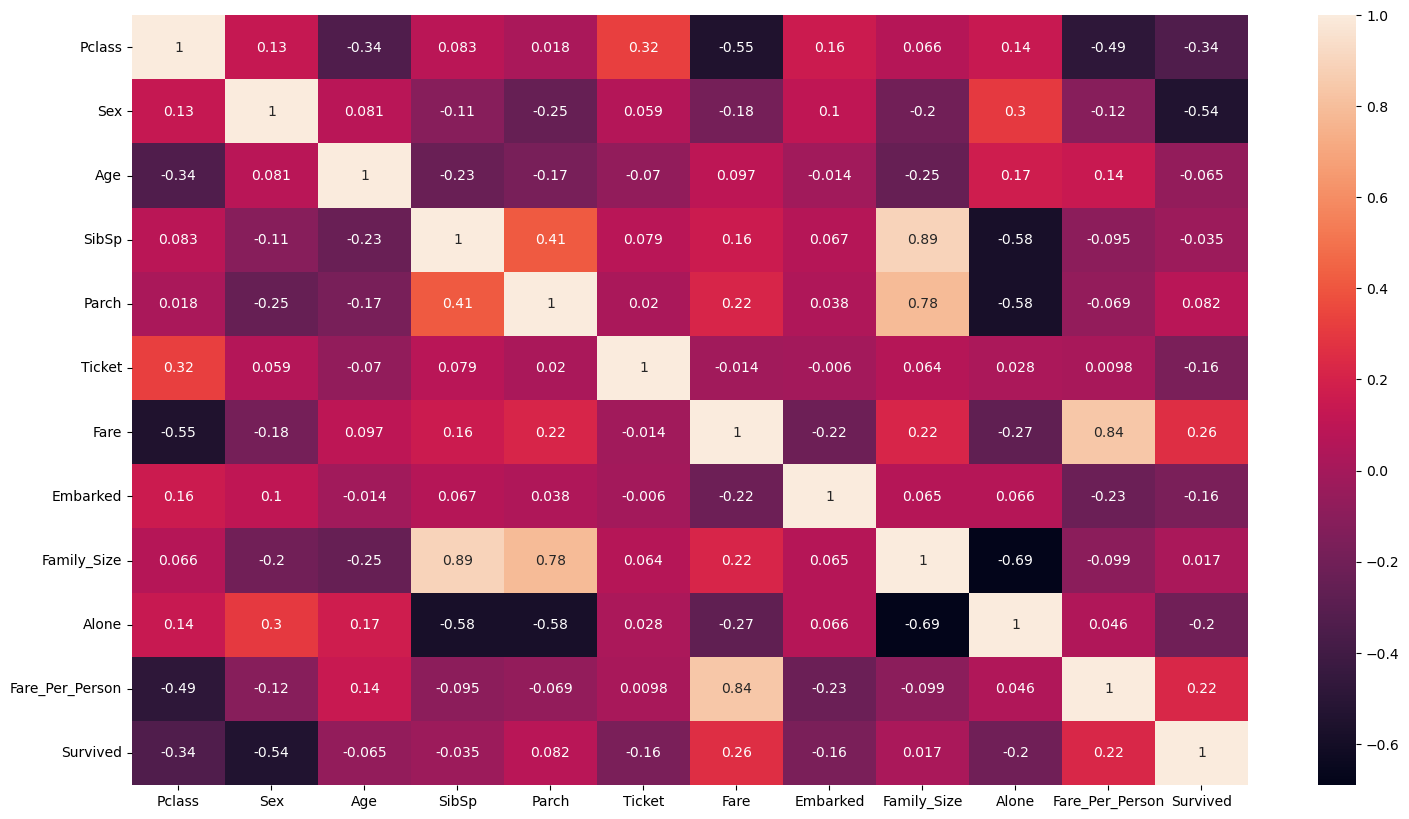

In [57]:
# show the corre
plt.figure(figsize=(18, 10))
sns.heatmap(data=data.corr(), annot=True)
plt.show();

In [58]:
# scallin the test data
X_test_scalled = Min_max.transform(X_test_imputed)
X_test_scalled = pd.DataFrame(X_test_scalled, columns=X_test_imputed.columns)
X_test_scalled

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family_Size,Alone,Fare_Per_Person
0,1.0,1.0,0.428248,0.000,0.000000,0.223529,0.015282,0.333333,0.0,1.0,0.015282
1,1.0,0.0,0.585323,0.125,0.000000,0.325000,0.013663,0.666667,0.1,0.0,0.006832
2,0.5,1.0,0.773813,0.000,0.000000,0.107353,0.018909,0.333333,0.0,1.0,0.018909
3,1.0,1.0,0.334004,0.000,0.000000,0.216176,0.016908,0.666667,0.0,1.0,0.016908
4,1.0,0.0,0.271174,0.125,0.166667,0.202941,0.023984,0.666667,0.2,0.0,0.007995
...,...,...,...,...,...,...,...,...,...,...,...
412,1.0,1.0,0.346569,0.000,0.000000,0.392647,0.015713,0.666667,0.0,1.0,0.015713
413,0.0,0.0,0.484795,0.000,0.000000,0.476471,0.212559,0.000000,0.0,1.0,0.212559
414,1.0,1.0,0.478512,0.000,0.000000,0.508824,0.014151,0.666667,0.0,1.0,0.014151
415,1.0,1.0,0.346569,0.000,0.000000,0.323529,0.015713,0.666667,0.0,1.0,0.015713


### `*split the data`

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X_scalled, y, random_state=42, test_size=0.15)

In [60]:
# show the shapes
print(f"the X_train shape is {X_train.shape}")
print(f"the X_test shape is {X_test.shape}")
print(f"the y_train shape is {y_train.shape}")
print(f"the y_test shape is {y_test.shape}")

the X_train shape is (757, 11)
the X_test shape is (134, 11)
the y_train shape is (757,)
the y_test shape is (134,)


### `*models`

### `RandomForestClassifier`

In [74]:
# tunnig the hyperparameters
forest = RandomForestClassifier()

param = {
    "n_estimators" : [i for i in range(150, 300, 20)],
    "max_depth" : [i for i in range(5, 10, 3)],
    'criterion' : ["gini", "entropy", "log_loss"],
}

grid_search = GridSearchCV(estimator=forest, param_grid=param, scoring="precision", cv=5, n_jobs=-1)

# fitting
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [5, 8],
                         'n_estimators': [150, 170, 190, 210, 230, 250, 270,
                                          290]},
             scoring='precision')

In [75]:
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 5, 'n_estimators': 210}

In [76]:
# the final model 
forest_cls = grid_search.best_estimator_

the scores is ==> [0.88095238 0.75438596 0.88636364 0.75555556 0.82978723]
the mean to the scores is ==> 0.8214089543652813
****************************************************************************************************
the confusion matrix:


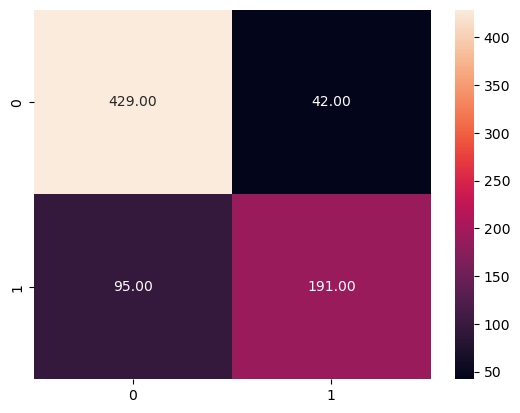

In [83]:
# make croos validation
croos_val = cross_val_score(estimator=forest_cls, X=X_train, y=y_train,
                            cv=5, scoring="precision", n_jobs=-1)
# print the croos val for every fold
print(f"the scores is ==> {croos_val}")

# show the mean for the scores
print(f"the mean to the scores is ==> {croos_val.mean()}")

print("**"*50)

# make croos validation to predict
croos_val_pred = cross_val_predict(estimator=forest_cls, X=X_train, y=y_train, 
                                   cv=5, method="predict", n_jobs=-1 )

# show the confusion matrix
print("the confusion matrix:")
confusion = confusion_matrix(y_train, croos_val_pred)
sns.heatmap(confusion, annot=True, fmt=".2f")
plt.show()

In [89]:
# show the feature importance 
importance = forest_cls.feature_importances_
importance

array([0.10326786, 0.40505575, 0.08189474, 0.02036875, 0.01732793,
       0.09329227, 0.11065198, 0.01366063, 0.03865801, 0.01016573,
       0.10565635])

In [90]:
# get the columns
columns = [col for col in X_train.columns]
columns

['Pclass',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Embarked',
 'Family_Size',
 'Alone',
 'Fare_Per_Person']

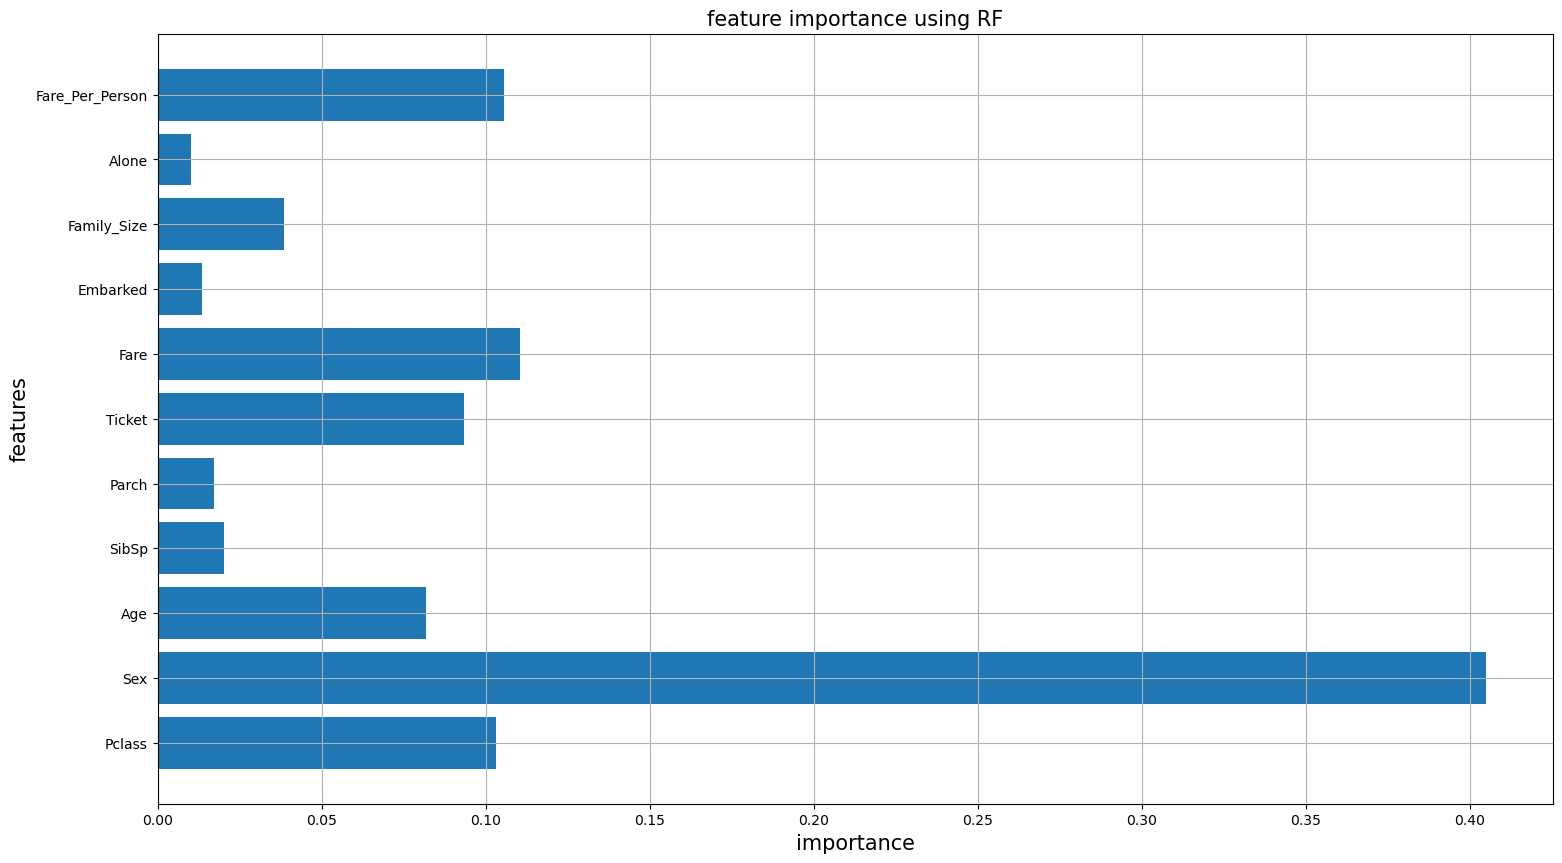

In [97]:
# show the feature importance with RF
plt.figure(figsize=(18, 10))
plt.barh(y=columns, width=importance, data=X_train)
plt.title("feature importance using RF", color="k", fontsize=15)
plt.xlabel("importance", color="k", fontsize=15)
plt.ylabel("features", color="k", fontsize=15)
plt.grid()
plt.show()

In [99]:
# the scores
print(f"the score in the train is {forest_cls.score(X_train, y_train)}")
print(f"the score in the test is {forest_cls.score(X_test, y_test)}")

the score in the train is 0.8771466314398944
the score in the test is 0.8283582089552238


In [101]:
# prediction
y_pred_RF = forest_cls.predict(X_test)

In [103]:
pd.DataFrame(np.c_[y_pred_RF, y_test], columns=["prediction", "Actual"])

,prediction,Actual
0,0,1
1,0,0
2,0,0
3,1,1
4,1,1
...,...,...
129,0,0
130,1,1
131,0,1
132,0,0


<Axes: >

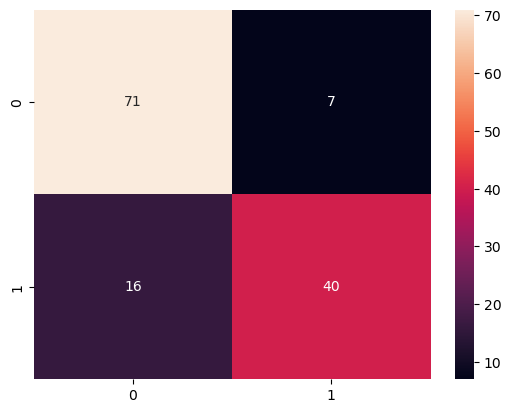

In [104]:
# show confusion_matrix
sns.heatmap(data=confusion_matrix(y_test, y_pred_RF), annot=True)

### `*AdaBoostClassifier`

In [122]:
# tunnig the hyperparameters for DT

Dt = DecisionTreeClassifier()

param = {"criterion": ["gini", "entropy", "log_loss"],
         "splitter" : ["best", "random"],
          "max_depth": np.arange(2, 20, 1),
         "min_samples_split": np.arange(2, 5, 1)}


DT_grid = GridSearchCV(estimator=Dt, param_grid=param, cv=5, n_jobs=-1, scoring="precision")

# fitting
DT_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                         'min_samples_split': array([2, 3, 4]),
                         'splitter': ['best', 'random']},
             scoring='precision')

In [123]:
# show the best parameters
DT_grid.best_params_

{'criterion': 'gini',
 'max_depth': 2,
 'min_samples_split': 2,
 'splitter': 'best'}

In [127]:
# make the model 
DT_model = DT_grid.best_estimator_

In [128]:
# make croos validation
croos_val = cross_val_score(estimator=DT_model, X=X_train, y=y_train,
                            cv=5, scoring="precision", n_jobs=-1)
# print the croos val for every fold
print(f"the scores is ==> {croos_val}")

# show the mean for the scores
print(f"the mean to the scores is ==> {croos_val.mean()}")

the scores is ==> [0.88235294 0.69642857 1.         0.96       0.96296296]
the mean to the scores is ==> 0.9003488951136009


In [141]:
# tunning the hyperparameters to AdaBoostClassifier model
AdaBoostClf = AdaBoostClassifier()

param = {
    "estimator" : [DT_model],
    "n_estimators" : np.arange(10, 100, 10),
    "learning_rate" : np.arange(0.1, 1, 0.2)
}

AdaBoostClf_grid = GridSearchCV(estimator=AdaBoostClf, param_grid=param, scoring="precision", n_jobs=-1, cv=5)
# fitting 

AdaBoostClf_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'estimator': [DecisionTreeClassifier(max_depth=2)],
                         'learning_rate': array([0.1, 0.3, 0.5, 0.7, 0.9]),
                         'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
             scoring='precision')

In [142]:
# show the best params
AdaBoostClf_grid.best_params_

{'estimator': DecisionTreeClassifier(max_depth=2),
 'learning_rate': 0.1,
 'n_estimators': 20}

In [143]:
# the final model 
AdaBoostClf_final = AdaBoostClf_grid.best_estimator_

the scores is ==> [0.90243902 0.7755102  0.82       0.8        0.85714286]
the mean to the scores is ==> 0.8310184171229466
****************************************************************************************************
the confusion matrix:


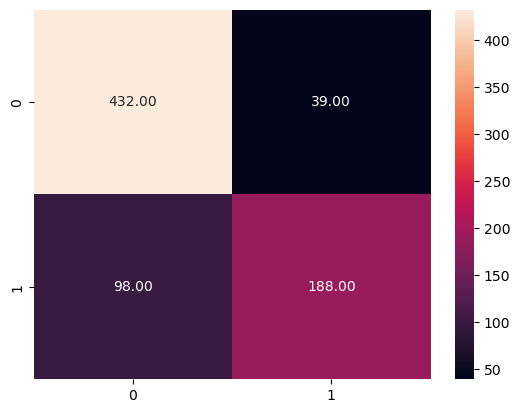

In [144]:
# make croos validation
croos_val = cross_val_score(estimator=AdaBoostClf_final, X=X_train, y=y_train,
                            cv=5, scoring="precision", n_jobs=-1)
# print the croos val for every fold
print(f"the scores is ==> {croos_val}")

# show the mean for the scores
print(f"the mean to the scores is ==> {croos_val.mean()}")

print("**"*50)

# make croos validation to predict
croos_val_pred = cross_val_predict(estimator=AdaBoostClf_final, X=X_train, y=y_train, 
                                   cv=5, method="predict", n_jobs=-1 )

# show the confusion matrix
print("the confusion matrix:")
confusion = confusion_matrix(y_train, croos_val_pred)
sns.heatmap(confusion, annot=True, fmt=".2f")
plt.show()

In [145]:
# show the feature importance 
importance = AdaBoostClf_final.feature_importances_
importance

array([0.10343607, 0.38941   , 0.14444308, 0.        , 0.        ,
       0.14031906, 0.0412928 , 0.        , 0.07748974, 0.        ,
       0.10360925])

In [146]:
# get the columns
columns = [col for col in X_train.columns]
columns

['Pclass',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Embarked',
 'Family_Size',
 'Alone',
 'Fare_Per_Person']

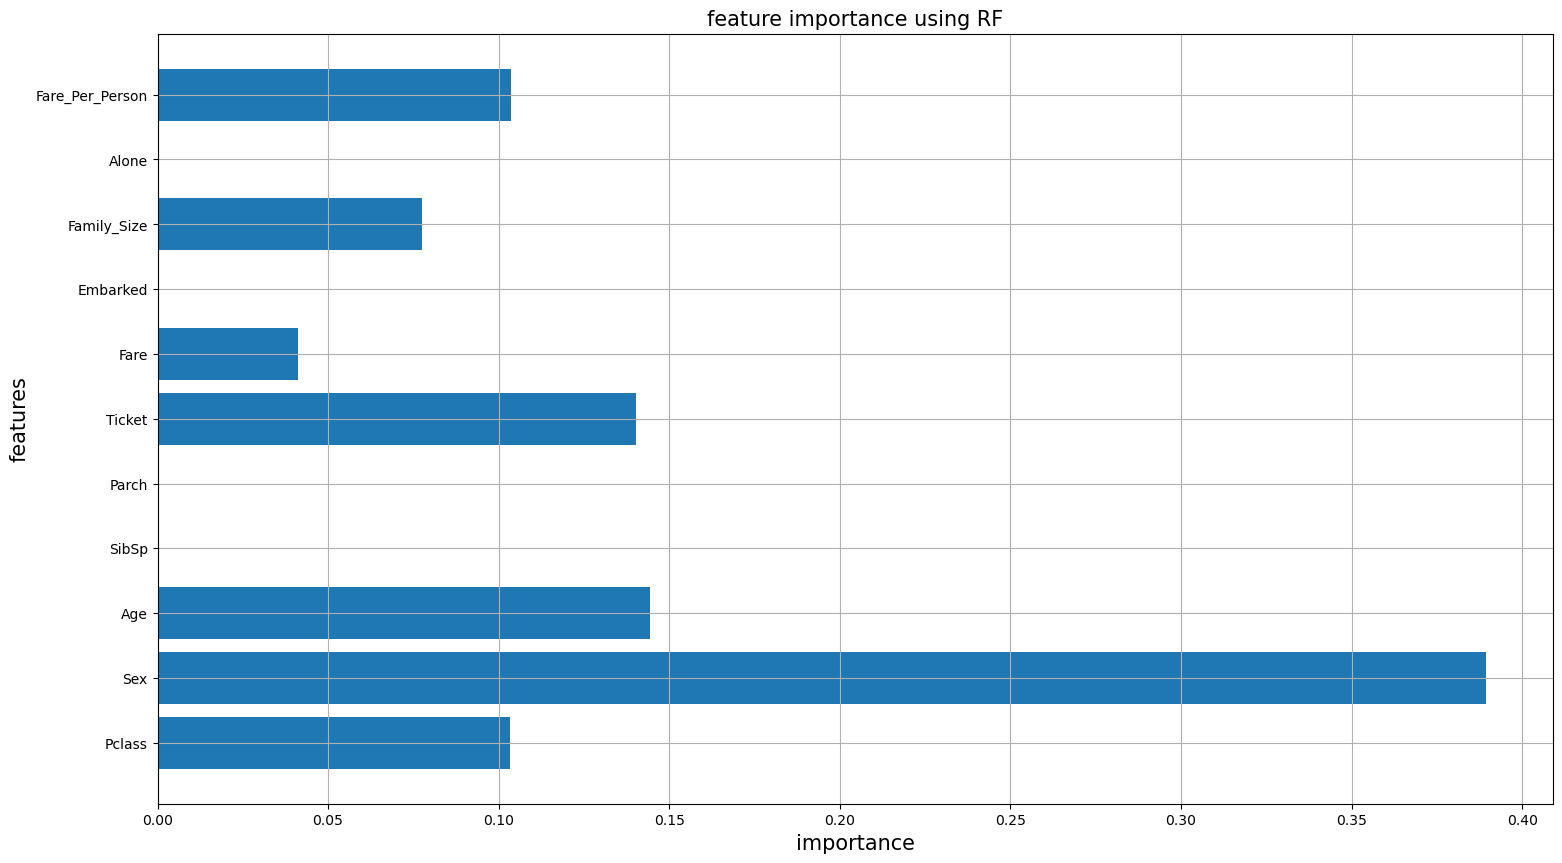

In [147]:
# show the feature importance with RF
plt.figure(figsize=(18, 10))
plt.barh(y=columns, width=importance, data=X_train)
plt.title("feature importance using RF", color="k", fontsize=15)
plt.xlabel("importance", color="k", fontsize=15)
plt.ylabel("features", color="k", fontsize=15)
plt.grid()
plt.show()

In [148]:
# the scores
print(f"the score in the train is {AdaBoostClf_final.score(X_train, y_train)}")
print(f"the score in the test is {AdaBoostClf_final.score(X_test, y_test)}")

the score in the train is 0.8269484808454426
the score in the test is 0.8134328358208955


In [149]:
# prediction
y_pred_ِAda = AdaBoostClf_final.predict(X_test)

In [150]:
pd.DataFrame(np.c_[y_pred_ِAda, y_test], columns=["prediction", "Actual"])

,prediction,Actual
0,0,1
1,0,0
2,0,0
3,1,1
4,1,1
...,...,...
129,0,0
130,1,1
131,0,1
132,0,0


<Axes: >

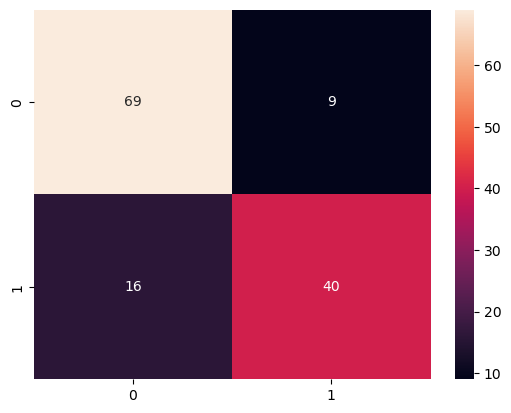

In [151]:
# show confusion_matrix
sns.heatmap(data=confusion_matrix(y_test, y_pred_ِAda), annot=True)

### `XGboost`

In [183]:
# tunnig the hyperparameters for DT
Xgb_cls = xgb.XGBClassifier()

params = {
    "n_estimators" : np.arange(50, 200, 10),
    "max_depth" : np.arange(2, 10, 1),
    "learning_rate" : np.arange(0.1, 1, 0.1),
    "subsample" : np.arange(0.2, 1, 0.25),
    "alpha" :  np.arange(0.1, 1, 0.1)
}

Xgb_cls_grid = RandomizedSearchCV(estimator=Xgb_cls, param_distributions=params, n_jobs=-1,
                                  cv=5, scoring="precision", n_iter=500)


# fitting
Xgb_cls_grid.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           random_state=None, ...),
                   n_iter=500, n_jobs=-1,
                   param_distributions={'alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'n_estimators': array([ 50,  60,  70,  80,  90, 100, 110, 120, 130, 140, 150, 160, 170,
       180, 190]),
                                        'subsample': array([0.2 , 0.45, 0.7 , 0.95])},
                   scoring='precision')

In [184]:
# show the best params
Xgb_cls_grid.best_params_

{'subsample': 0.7,
 'n_estimators': 80,
 'max_depth': 2,
 'learning_rate': 0.1,
 'alpha': 0.7000000000000001}

In [185]:
# the final model
Xgb_cls_final = Xgb_cls_grid.best_estimator_

the scores is ==> [0.88372093 0.77192982 0.85416667 0.81632653 0.78181818]
the mean to the scores is ==> 0.8215924267782111
****************************************************************************************************
the confusion matrix:


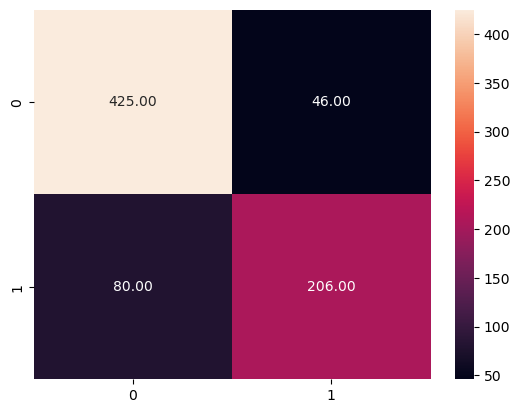

In [186]:
# make croos validation
croos_val = cross_val_score(estimator=Xgb_cls_final, X=X_train, y=y_train,
                            cv=5, scoring="precision", n_jobs=-1)
# print the croos val for every fold
print(f"the scores is ==> {croos_val}")

# show the mean for the scores
print(f"the mean to the scores is ==> {croos_val.mean()}")

print("**"*50)

# make croos validation to predict
croos_val_pred = cross_val_predict(estimator=Xgb_cls_final, X=X_train, y=y_train, 
                                   cv=5, method="predict", n_jobs=-1 )

# show the confusion matrix
print("the confusion matrix:")
confusion = confusion_matrix(y_train, croos_val_pred)
sns.heatmap(confusion, annot=True, fmt=".2f")
plt.show()

In [187]:
# the scores
print(f"the score in the train is {Xgb_cls_final.score(X_train, y_train)}")
print(f"the score in the test is {Xgb_cls_final.score(X_test, y_test)}")

the score in the train is 0.8652575957727873
the score in the test is 0.8134328358208955


In [188]:
# prediction
y_pred_ِXGb = AdaBoostClf_final.predict(X_test)

In [189]:
pd.DataFrame(np.c_[y_pred_ِXGb, y_test], columns=["prediction", "Actual"])

,prediction,Actual
0,0,1
1,0,0
2,0,0
3,1,1
4,1,1
...,...,...
129,0,0
130,1,1
131,0,1
132,0,0


<Axes: >

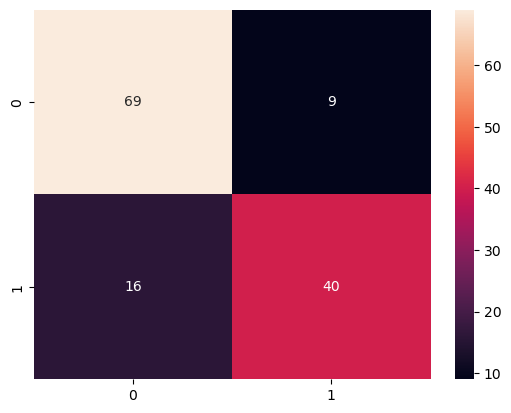

In [190]:
# show confusion_matrix
sns.heatmap(data=confusion_matrix(y_test, y_pred_ِXGb), annot=True)

### `VotingClassifier`

In [203]:
#VotingClassifier model
voting = VotingClassifier(estimators=[
    ("XGboost", Xgb_cls_final),
    ("Adaboost", AdaBoostClf_final),
    ("RF", forest_cls)
], voting="soft", n_jobs=-1)

# fitting
voting.fit(X_train, y_train)

VotingClassifier(estimators=[('XGboost',
                              XGBClassifier(alpha=0.7000000000000001,
                                            base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction...
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=80, n_jobs=None,
                                            num_parallel_tree=None, ...)),
                             ('Adaboost',
                              AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2),
                                                 learning_rate=0.1,
                                                 n_estimators=20)),
                             ('RF',
                              RandomForestClassifier(max_depth=5,
                                                     n_estimators=210))],
                 n_jobs=-1, voting='soft')

the scores is ==> [0.925      0.78846154 0.82352941 0.7755102  0.86666667]
the mean to the scores is ==> 0.8358335641949088
****************************************************************************************************
the confusion matrix:


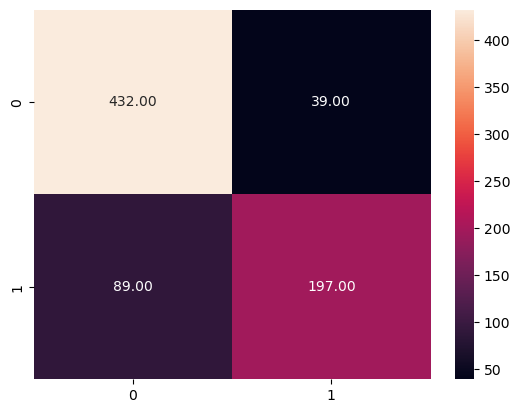

In [204]:
# make croos validation
croos_val = cross_val_score(estimator=voting, X=X_train, y=y_train,
                            cv=5, scoring="precision", n_jobs=-1)
# print the croos val for every fold
print(f"the scores is ==> {croos_val}")

# show the mean for the scores
print(f"the mean to the scores is ==> {croos_val.mean()}")

print("**"*50)

# make croos validation to predict
croos_val_pred = cross_val_predict(estimator=voting, X=X_train, y=y_train, 
                                   cv=5, method="predict", n_jobs=-1 )

# show the confusion matrix
print("the confusion matrix:")
confusion = confusion_matrix(y_train, croos_val_pred)
sns.heatmap(confusion, annot=True, fmt=".2f")
plt.show()

In [205]:
# the scores
print(f"the score in the train is {voting.score(X_train, y_train)}")
print(f"the score in the test is {voting.score(X_test, y_test)}")

the score in the train is 0.8665785997357992
the score in the test is 0.8134328358208955


In [206]:
# prediction
y_pred_ِvoting = AdaBoostClf_final.predict(X_test)

In [207]:
pd.DataFrame(np.c_[y_pred_ِvoting, y_test], columns=["prediction", "Actual"])

,prediction,Actual
0,0,1
1,0,0
2,0,0
3,1,1
4,1,1
...,...,...
129,0,0
130,1,1
131,0,1
132,0,0


<Axes: >

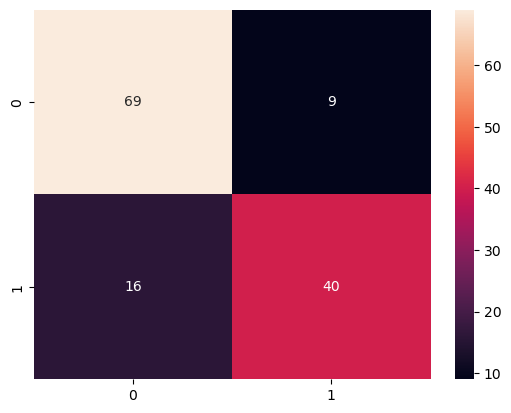

In [208]:
# show confusion_matrix
sns.heatmap(data=confusion_matrix(y_test, y_pred_ِvoting), annot=True)